In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, fcluster
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import cdist
import ast
import csv

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
## 注意：output 可以用 method 命名
input_file = '/content/drive/My Drive/IRTM_final_project/vectors/1220_vector.csv'
output_file = '/content/drive/My Drive/IRTM_final_project/cluster_result/HAC_Kmeans.csv' # 重新取名

df = pd.read_csv(input_file, encoding='utf-8')
df['parsed_vector'] = df['vector'].apply(lambda x: np.array(eval(x), dtype=np.float64))

feature_vectors = np.stack(df['parsed_vector'].values)

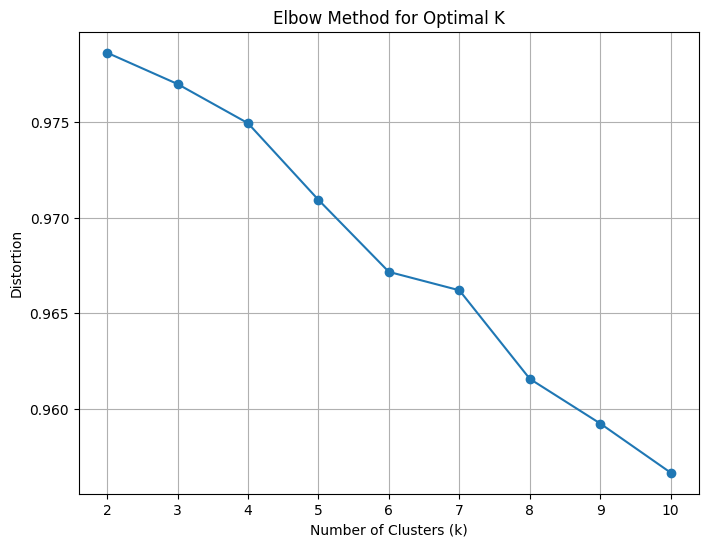

In [ ]:
## 注意：如果已經確定 k 的話這格就不用跑
# def plot_elbow_method(data, k_range=range(2, 11), save_path=None):
#     distortions = []
#     for k in k_range:
#         kmeans = KMeans(n_clusters=k, random_state=42)
#         kmeans.fit(data)
#         distortions.append(sum(np.min(cdist(data, kmeans.cluster_centers_, 'euclidean'), axis=1)) / data.shape[0])

#     plt.figure(figsize=(8, 6))
#     plt.plot(k_range, distortions, marker='o')
#     plt.title("Elbow Method for Optimal K")
#     plt.xlabel("Number of Clusters (k)")
#     plt.ylabel("Distortion")
#     plt.xticks(k_range)
#     plt.grid(True)

#     if save_path:
#         plt.savefig(save_path)
#     else:
#         plt.show()

# plot_elbow_method(feature_vectors, save_path='/content/drive/My Drive/IRTM_final_project/cluster_result/elbow_method.png')

In [10]:
def hac_clustering(data, k, linkage_method):
    linkage_matrix = linkage(data, method=linkage_method)
    clusters = fcluster(linkage_matrix, k, criterion='maxclust')
    return clusters

def kmeans_clustering(data, k):
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(data)
    return clusters

def hac_init_kmeans(data, k, linkage_method, subset_ratio=0.1):
    subset_size = int(len(data) * subset_ratio)
    subset_indices = np.random.choice(range(len(data)), size=subset_size, replace=False)
    subset_data = data[subset_indices]

    linkage_matrix = linkage(subset_data, method=linkage_method)
    subset_clusters = fcluster(linkage_matrix, k, criterion='maxclust')
    print("\nStart to calculate center...")
    centers = []
    for cluster_id in range(1, k + 1):
        cluster_points = subset_data[subset_clusters == cluster_id]
        centers.append(cluster_points.mean(axis=0))

    kmeans = KMeans(n_clusters=k, init=np.array(centers), n_init=1, random_state=42)
    full_clusters = kmeans.fit_predict(data)
    return full_clusters

def save_cluster_results(ids, clusters):
    cluster_dict = {}
    for cluster_id in np.unique(clusters):
        cluster_dict[f'cluster{cluster_id}'] = ids[clusters == cluster_id].tolist()

    with open(output_file, 'w', newline='', encoding='utf-8') as f:
      writer = csv.writer(f)
      writer.writerow(['cluster_name', 'members'])
      for cluster_name, cluster_ids in cluster_dict.items():
          writer.writerow([cluster_name, ','.join(map(str, cluster_ids))])
    print(f"分群結果已儲存至 {output_file}")

In [ ]:
## 如果今天要跑 hac，記得要改指定 k 值以及 hac 的 method
ids = df['id'].values
hac_clusters = hac_clustering(feature_vectors, k=8, linkage_method='single')
print("\nStart saving the results...")
save_cluster_results(ids, hac_clusters)


Start saving the results...
分群結果已儲存至 /content/drive/My Drive/IRTM_final_project/cluster_result/sample.csv


In [ ]:
## 如果今天要跑 kmeans，記得要改指定 k 值
ids = df['id'].values
kmeans_clusters = kmeans_clustering(feature_vectors, k=8)
print("\nStart saving the results...")
save_cluster_results(ids, kmeans_clusters)


Start saving the results...
分群結果已儲存至 /content/drive/My Drive/IRTM_final_project/cluster_result/sample.csv


In [ ]:
## 如果今天要跑 hac + kmeans，記得要改指定 k 值以及 hac 的 method 還有想要切割多少出來當 subset
output_file = '/content/drive/My Drive/IRTM_final_project/cluster_result/complete_8_0.1.csv'
hac_kmeans_clusters = hac_init_kmeans(feature_vectors, k=8, linkage_method='complete', subset_ratio=0.1)
print("\nStart saving the results...")
save_cluster_results(ids, hac_kmeans_clusters)


Start to calculate center...


<ipython-input-10-56344bbfbd1d>:22: RuntimeWarning: Mean of empty slice.
  centers.append(cluster_points.mean(axis=0))
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:121: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


In [19]:
import pandas as pd

# 假设你的数据在 DataFrame 中
print(feature_vectors.shape)
print(np.isnan(feature_vectors).sum())

(47967, 5000)
0
